## Loan Lending EDA

#### Data understandig and Data Cleaning

In [2]:
# import the neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading data file

loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# review the data structure
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.shape

(39717, 111)

As you can see that this is a huge dataset with lots of missing values and redundant columns so it needs to be drop.

In [6]:
# Drop the coloumns from index 53 to 110 as they have 100 % null values and irrelevant for the analysis

loan.drop(loan.iloc[:, 53:110], inplace = True, axis = 1)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   grade                        39717 non-null  object 
 9   sub_grade                    39717 non-null  object 
 10  emp_title                    37258 non-null  object 
 11  emp_length                   38642 non-null  object 
 12  home_ownership               39717 non-null  object 
 13  annual_inc      

In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,Jun-16,May-16,0.0,NaN,1,INDIVIDUAL,NaN


#### Missing value treatement 

In [8]:
loan.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2459
emp_length                      1075
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12940
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
i

In [9]:
# lets see the percentage of missing values in column

round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

In [10]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'total_il_high_credit_limit'],
      dtype='object')

In [11]:
# take those variables that are useful for our analysis

df = loan[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status','purpose','dti','total_rec_prncp']]

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,total_rec_prncp
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,5000.00
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,456.46
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2400.00
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,10000.00
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,2475.94


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_length           38642 non-null  object 
 11  home_ownership       39717 non-null  object 
 12  annual_inc           39717 non-null  float64
 13  verification_status  39717 non-null  object 
 14  issue_d              39717 non-null  object 
 15  loan_status          39717 non-null 

Here we have target variable **loan status** and that needs to in binary form 0 and 1 where 1 is for default and 0 is for not default.

In [14]:
# Check the categories of loan status and counts

df['loan_status'] = df['loan_status'].astype ('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

As per above result target variable has three categories. current loans means they are currently in progress so this category is not useful for our analysis so lets filter this.

In [15]:
# filtering data

df = df[df['loan_status'] != 'Current']

df['loan_status'] = df['loan_status'].astype ('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

In [16]:
# lets convert it into binary for 0 and 1

df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x =='Fully Paid' else 1)
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt          38577 non-null  int64  
 4   funded_amnt_inv      38577 non-null  float64
 5   term                 38577 non-null  object 
 6   int_rate             38577 non-null  object 
 7   installment          38577 non-null  float64
 8   grade                38577 non-null  object 
 9   sub_grade            38577 non-null  object 
 10  emp_length           37544 non-null  object 
 11  home_ownership       38577 non-null  object 
 12  annual_inc           38577 non-null  float64
 13  verification_status  38577 non-null  object 
 14  issue_d              38577 non-null  object 
 15  loan_status          38577 non-null 

In [18]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,total_rec_prncp
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,5000.00
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,456.46
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,2400.00
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,10000.00
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,5000.00


In [19]:
# variable int_rate is object type.
# convbert it into float

df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt          38577 non-null  int64  
 4   funded_amnt_inv      38577 non-null  float64
 5   term                 38577 non-null  object 
 6   int_rate             38577 non-null  object 
 7   installment          38577 non-null  float64
 8   grade                38577 non-null  object 
 9   sub_grade            38577 non-null  object 
 10  emp_length           37544 non-null  object 
 11  home_ownership       38577 non-null  object 
 12  annual_inc           38577 non-null  float64
 13  verification_status  38577 non-null  object 
 14  issue_d              38577 non-null  object 
 15  loan_status          38577 non-null 

In [20]:
df['int_rate']= df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt          38577 non-null  int64  
 4   funded_amnt_inv      38577 non-null  float64
 5   term                 38577 non-null  object 
 6   int_rate             38577 non-null  float64
 7   installment          38577 non-null  float64
 8   grade                38577 non-null  object 
 9   sub_grade            38577 non-null  object 
 10  emp_length           37544 non-null  object 
 11  home_ownership       38577 non-null  object 
 12  annual_inc           38577 non-null  float64
 13  verification_status  38577 non-null  object 
 14  issue_d              38577 non-null  object 
 15  loan_status          38577 non-null 

In [21]:
# extract the numeric value of emp_length variable

# remove the rows with null values 

df = df [~df['emp_length'].isnull()]

import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])


df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37544 non-null  int64  
 1   member_id            37544 non-null  int64  
 2   loan_amnt            37544 non-null  int64  
 3   funded_amnt          37544 non-null  int64  
 4   funded_amnt_inv      37544 non-null  float64
 5   term                 37544 non-null  object 
 6   int_rate             37544 non-null  float64
 7   installment          37544 non-null  float64
 8   grade                37544 non-null  object 
 9   sub_grade            37544 non-null  object 
 10  emp_length           37544 non-null  int64  
 11  home_ownership       37544 non-null  object 
 12  annual_inc           37544 non-null  float64
 13  verification_status  37544 non-null  object 
 14  issue_d              37544 non-null  object 
 15  loan_status          37544 non-null 

In [22]:
# issue_d is in Month year format

from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x : datetime.strptime(x,'%b-%y'))

# Extract month and year

df['month'] = df['issue_d'].apply(lambda x : x.month)
df['year'] = df['issue_d'].apply(lambda x : x.year)

In [23]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,total_rec_prncp,month,year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,5000.00,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,RENT,30000.0,Source Verified,2011-12-01,1,car,1.00,456.46,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,RENT,12252.0,Not Verified,2011-12-01,0,small_business,8.72,2400.00,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,RENT,49200.0,Source Verified,2011-12-01,0,other,20.00,10000.00,12,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,RENT,36000.0,Source Verified,2011-12-01,0,wedding,11.20,5000.00,12,2011


### Univariate Analysis

In [24]:
# unique values of term column

df.term.nunique()

2

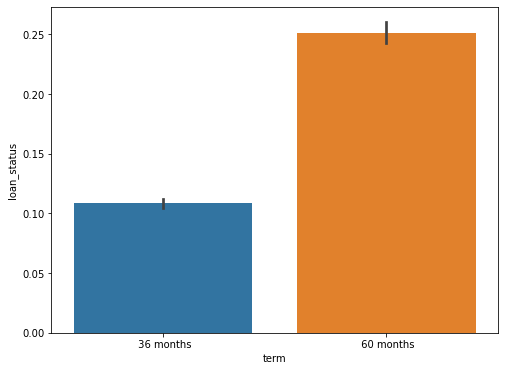

In [25]:
# Visualize the distribution of loan term

plt.figure(figsize=(8,6))
sns.barplot(x = 'term', y = 'loan_status',data = df)
plt.show()

- 5 year term loans tend to have higher defaulters

In [59]:
# Find total default rate

np.mean(df['loan_status'])

0.14380460259961644

In [26]:
# unique values of purpose column

df.purpose.nunique()

14

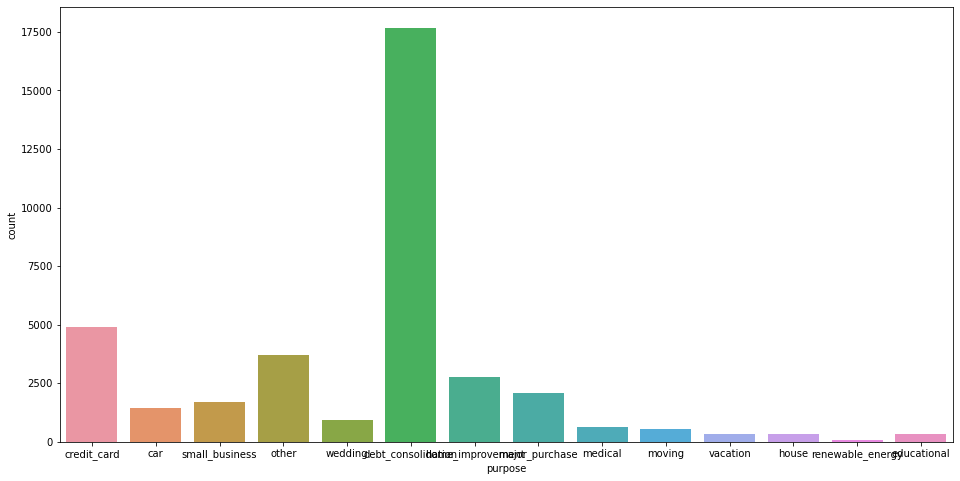

In [27]:
# visualize the types of loans

plt.figure(figsize=(16,8))
sns.countplot(x = 'purpose' ,data = df)
plt.show()

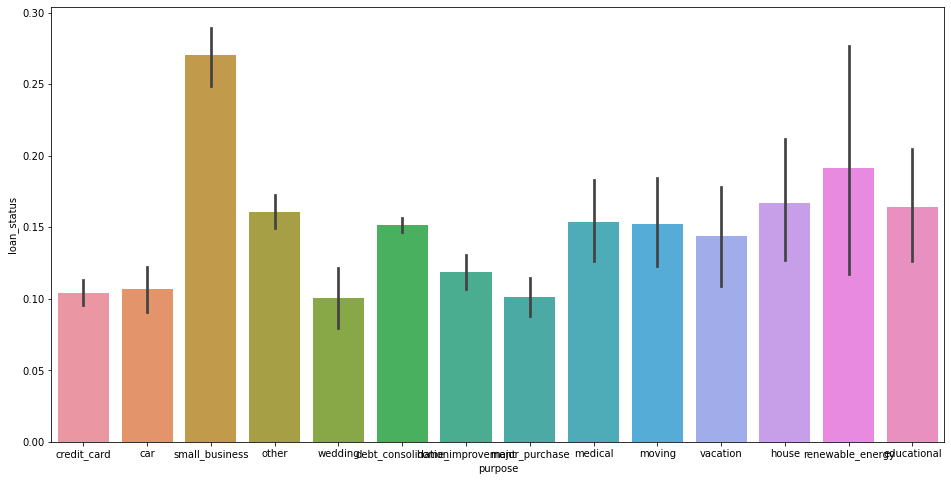

In [28]:

plt.figure(figsize=(16,8))

sns.barplot(x = 'purpose',y = 'loan_status' ,data = df)
plt.show()

1.Most of the loans are taken for consolidation purpose.

2.Top 5 purpose for loans which default are 

i) Small business

ii) Renewable energy

iii) Educational

iv) House

v) other

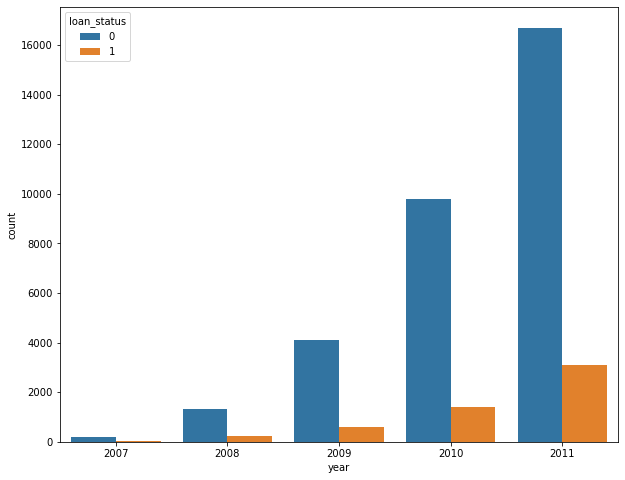

In [29]:
plt.figure(figsize = (10,8))

sns.countplot(x = 'year', data = df ,hue = 'loan_status')

plt.show()

- number of defualts has increased exponentially from 2007 to 2011

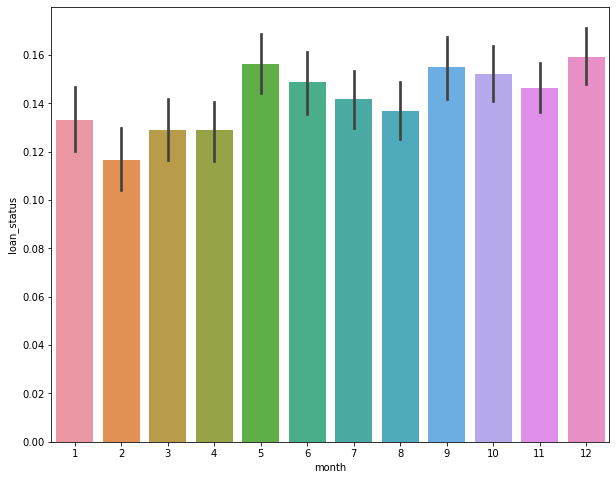

In [30]:
plt.figure(figsize = (10,8))

sns.barplot(x = 'month', y = 'loan_status', data = df)

plt.show()

- last quater of the year has a higher chances of default.

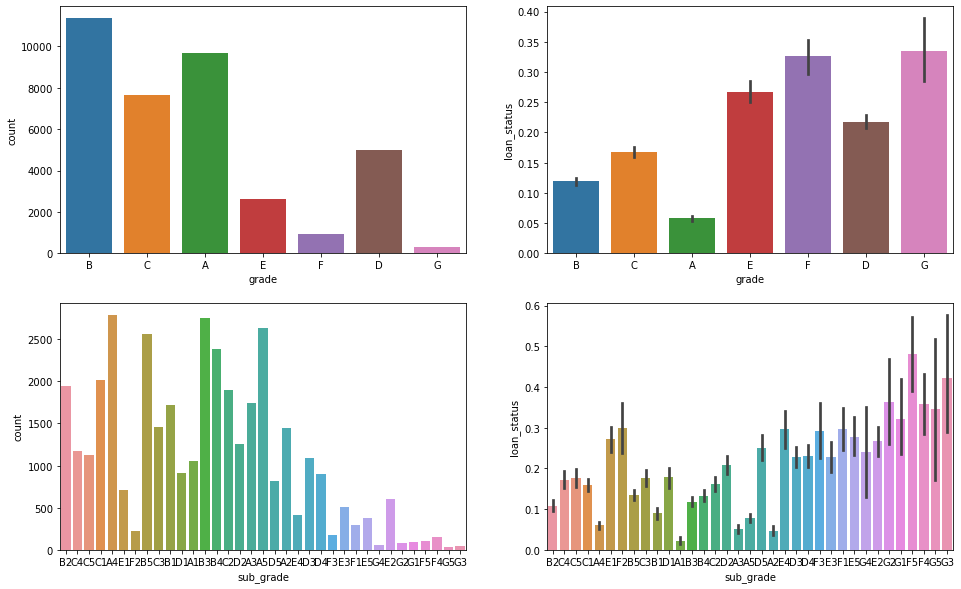

In [31]:
fig, ax = plt.subplots(2,2,figsize = (16,10))

sns.countplot(x = 'grade', data = df, ax = ax[0,0])

sns.barplot(x = 'grade', y = 'loan_status', data = df, ax = ax[0,1])

sns.countplot(x = 'sub_grade', data = df,ax = ax[1,0])

sns.barplot(x = 'sub_grade', y = 'loan_status', data = df, ax = ax[1,1])

plt.show()

1.most of loans are grades as A , B and C.

2.lower grades of loans has higher chances of getting default and also for subgrades.

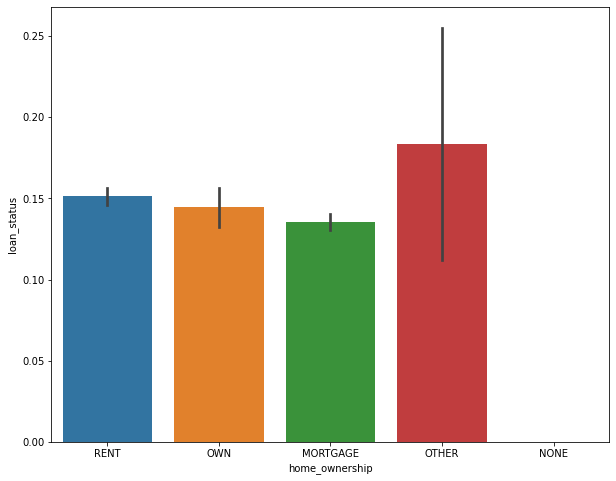

In [32]:
plt.figure(figsize = (10,8))

sns.barplot(x = 'home_ownership', y = 'loan_status', data = df)

plt.show()

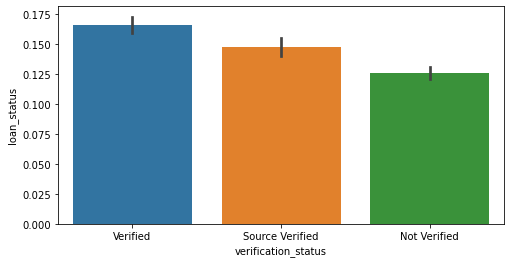

In [33]:
# lets check verification status affects loan status.
plt.figure(figsize = (8,4))

sns.barplot(x = 'verification_status', y = 'loan_status', data = df)

plt.show()


- As You can see from above verified loan has higher chances of getting default.

In [34]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,total_rec_prncp,month,year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,5000.00,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,RENT,30000.0,Source Verified,2011-12-01,1,car,1.00,456.46,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,RENT,12252.0,Not Verified,2011-12-01,0,small_business,8.72,2400.00,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,RENT,49200.0,Source Verified,2011-12-01,0,other,20.00,10000.00,12,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,RENT,36000.0,Source Verified,2011-12-01,0,wedding,11.20,5000.00,12,2011


In [35]:
# lets create categories of loan_amnt based on conditions so that it can be visualize easily

def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >= 5000 and n < 15000:
        return 'med'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
    
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

# also for interest rate

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <= 15:
        return 'med'
    else:
        return 'high'
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

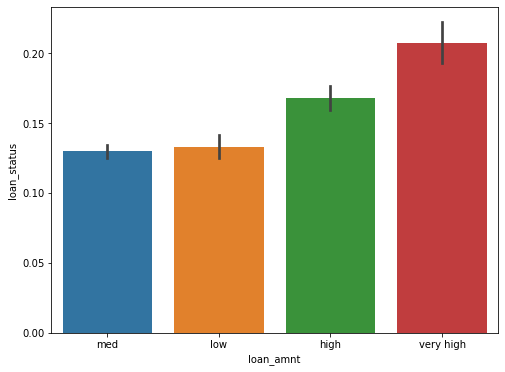

In [44]:
plt.figure(figsize = (8,6))

sns.barplot(x = 'loan_amnt', y = 'loan_status', data = df)

plt.show()

- High to very high loan amount has higher default rate

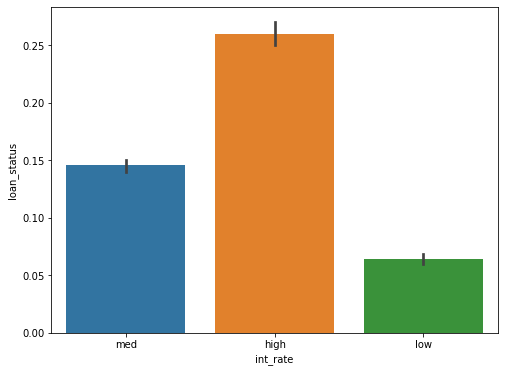

In [43]:
plt.figure(figsize = (8,6))

sns.barplot(x = 'int_rate', y = 'loan_status', data = df)

plt.show()

- High interest rate loans has higher default rate

## What is a debt-to-income ratio?

Debt-to-income ratio (DTI) is all monthly debt payments divided by gross monthly income. This number is one way lenders measure customers ability to manage the monthly payments to repay the money customer plan to borrow.

In [38]:
# lets categories DTI(debt-to-income ratio) into three level.

def DTI(n):
    if n <= 5:
        return 'low'
    elif n > 5 and n <= 15:
        return 'med'
    else:
        return 'high'
    
df['dti'] = df['dti'].apply(lambda x: DTI(x))

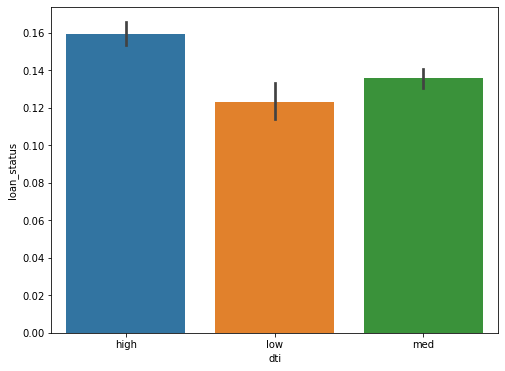

In [42]:
plt.figure(figsize = (8,6))

sns.barplot(x = 'dti', y = 'loan_status', data = df)

plt.show()

 - higher DTI is responsible for default rate.

#### Correlation between variables

In [53]:
df.drop(df.columns[[0,1]],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            37544 non-null  object        
 1   funded_amnt          37544 non-null  int64         
 2   funded_amnt_inv      37544 non-null  float64       
 3   term                 37544 non-null  object        
 4   int_rate             37544 non-null  object        
 5   installment          37544 non-null  float64       
 6   grade                37544 non-null  object        
 7   sub_grade            37544 non-null  object        
 8   emp_length           37544 non-null  int64         
 9   home_ownership       37544 non-null  object        
 10  annual_inc           37544 non-null  float64       
 11  verification_status  37544 non-null  object        
 12  issue_d              37544 non-null  datetime64[ns]
 13  loan_status          37544 non-

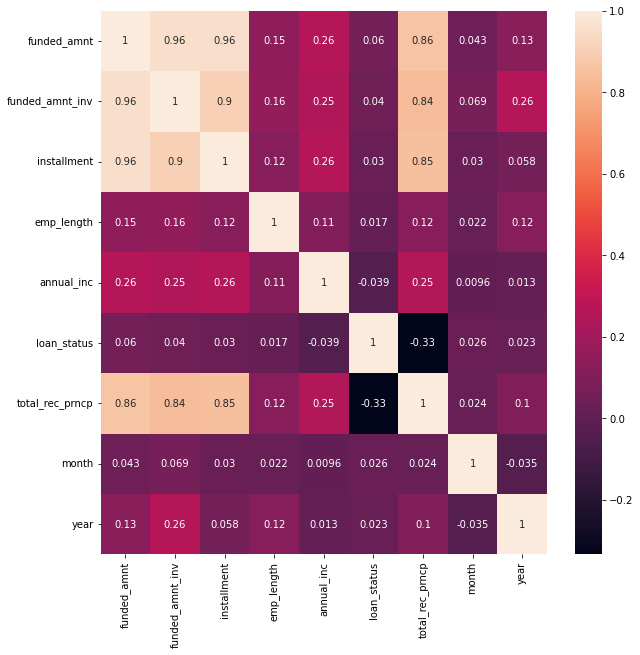

In [55]:
# heatmap
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot = True)
plt.show()

- **Funded amount** is highly correlated with **installments** and **Total principle amount recovered**.
- **loan status** is negatively correlated with **Total principle amount recovered**

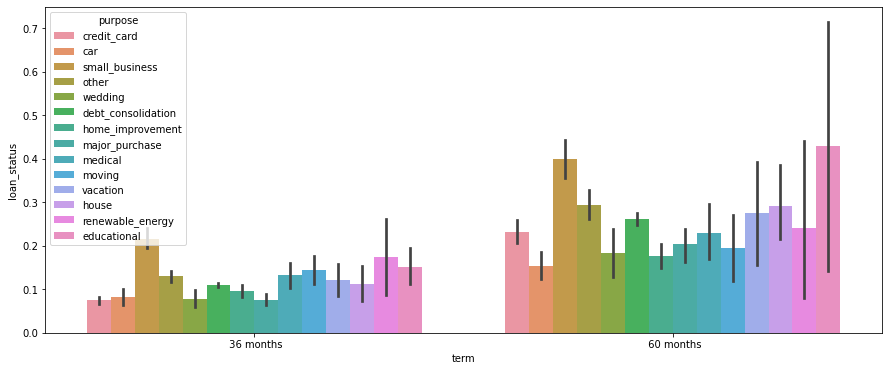

In [60]:
# visualize segment wise
plt.figure(figsize=[15,6])

sns.barplot(x='term', y='loan_status', hue = 'purpose', data = df)
plt.show()

30m term loans 
– small business and 
renewable energy purposes tend to default more.

60m term loans 
– educational and small 
businesses default high.